In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

PATH = r'images/test.jpg'

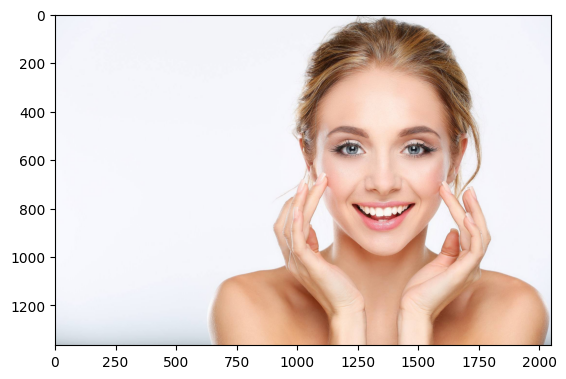

In [8]:
image = cv2.imread(PATH)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.show()

In [9]:
haarcascade = cv2.CascadeClassifier(r'cascades/haarcascade_frontalface_default.xml')
faces = haarcascade.detectMultiScale(rgb_image)
faces

array([[965, 251, 767, 767]])

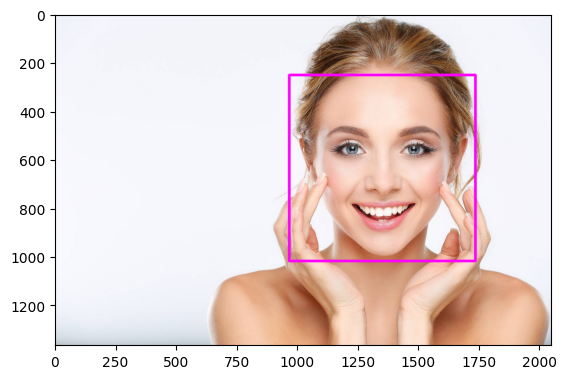

In [10]:
detected = np.copy(rgb_image)
for face in faces:
    detected = cv2.rectangle(detected, (face[0], face[1]), (face[0] + face[2], face[1] + face[3]), (255, 0, 255), 10)
plt.imshow(detected)
plt.show()

In [11]:
haarcascade_eye = cv2.CascadeClassifier(r'cascades/haarcascade_eye.xml')
eyes = haarcascade_eye.detectMultiScale(rgb_image)
eyes

array([[1127,  474,  158,  158],
       [1407,  475,  158,  158],
       [ 920, 1090,  174,  174],
       [1368,  714,   39,   39]])

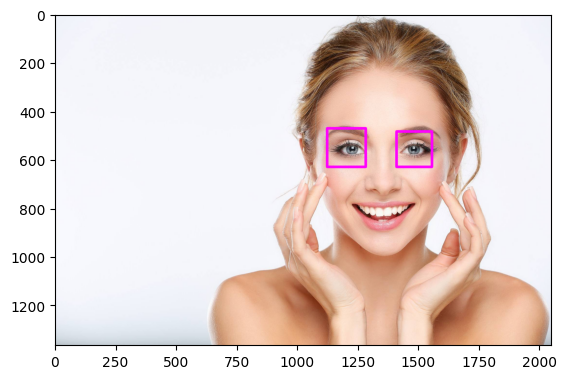

442

In [29]:
detected = np.copy(rgb_image)
for face in faces:
    detected_face = np.copy(rgb_image[face[1]:(face[1]+face[3]), face[0]:(face[0] + face[2])])
    eyes = haarcascade_eye.detectMultiScale(detected_face, minNeighbors=20)
    for eye in eyes:
        detected_face = cv2.rectangle(detected_face, (eye[0], eye[1]), (eye[0] + eye[2], eye[1] + eye[3]), (255, 0, 255), 10)
    detected[face[1]:(face[1]+face[3]), face[0]:(face[0] + face[2])] = np.copy(detected_face)
plt.imshow(detected)
plt.show()
eye[0]


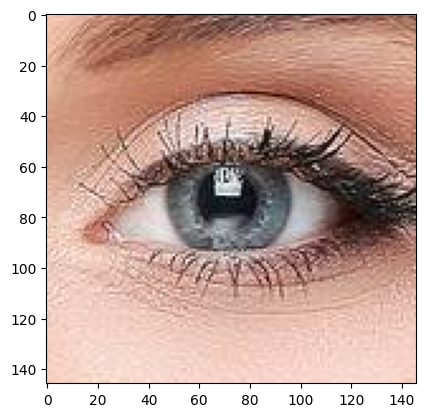

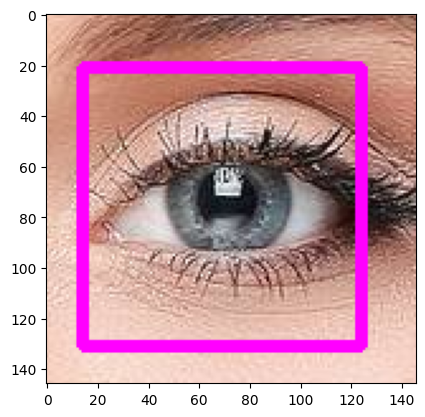

In [30]:
eye_img = np.copy(rgb_image[face[1] + eye[1]:(face[1] + eye[1]+eye[3]), face[0] + eye[0]:(face[0]+eye[0] + eye[2])])
eye_image = np.copy(eye_img)
plt.imshow(eye_img)
plt.show()
eyes = haarcascade_eye.detectMultiScale(eye_img, minNeighbors=20)
eyes = eyes[0]
eye_detect = cv2.rectangle(eye_image, (eyes[0], eyes[1]), (eyes[0] + eyes[2], eyes[1] + eyes[3]),(255, 0, 255), 3)
plt.imshow(eye_detect)
plt.show()


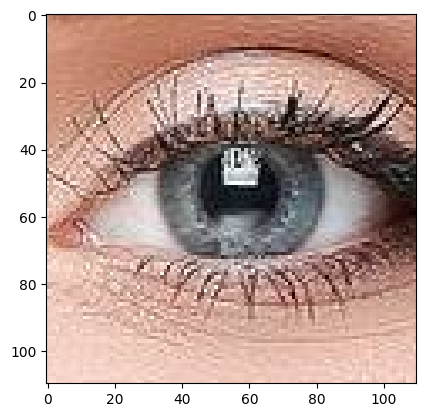

-1

In [43]:
eye_detect = np.copy(eye_img[eyes[1]: eyes[1] + eyes[3], eyes[0]: eyes[0] + eyes[2]])
plt.imshow(eye_detect)
plt.show()
eye = cv2.cvtColor(eye_detect, cv2.COLOR_RGB2GRAY)
for i in range(len(eye)):
    for j in range(len(eye[i])):
        if eye[i][j] < 50:
            eye[i][j] = 0
        else:
            eye[i][j] = 255
cv2.imshow('eye',eye)
cv2.waitKey(0)


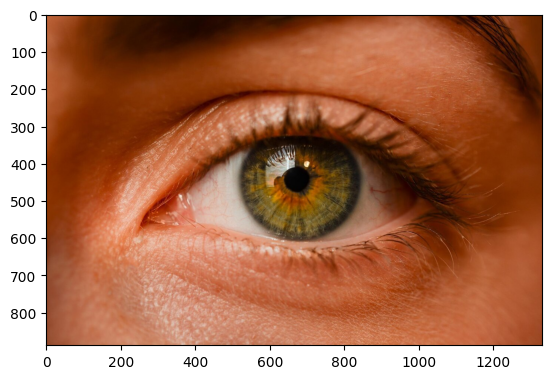

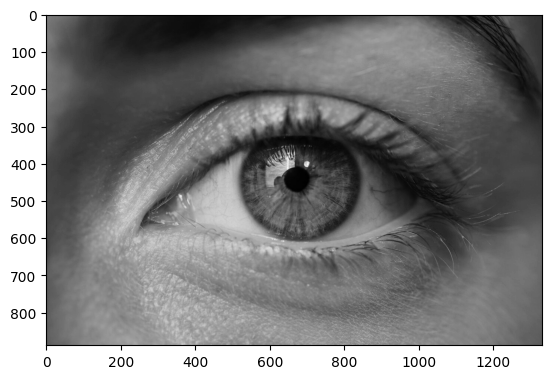

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

image = cv2.imread(r'images/eye.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

haarcascade_eye = cv2.CascadeClassifier(r'cascades/haarcascade_eye.xml')
eyes = haarcascade_eye.detectMultiScale(rgb_image)
gray_eye = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_eye, cmap='gray')
plt.show()

#contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)


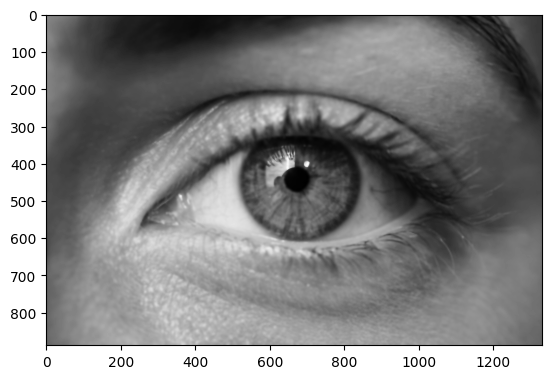

In [2]:
eye_blur = cv2.bilateralFilter(gray_eye, 9, 75, 75)
plt.imshow(eye_blur, cmap='gray')
plt.show()


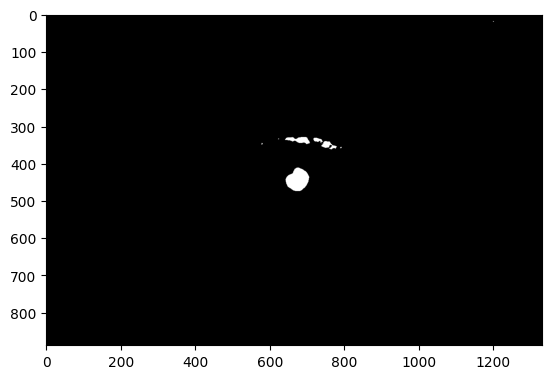

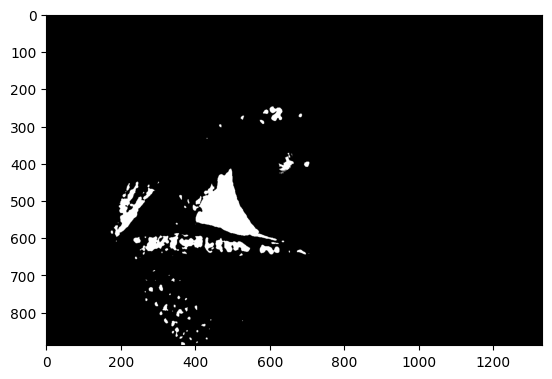

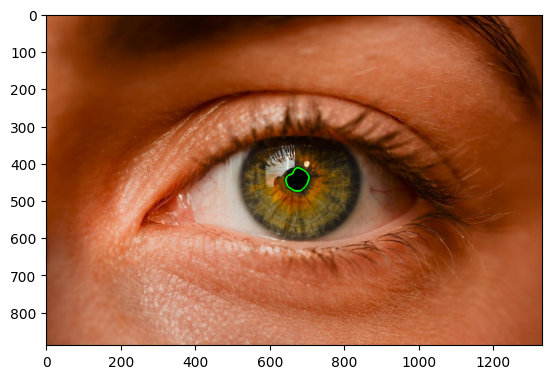

In [3]:
_, threshold_black = cv2.threshold(eye_blur, 10, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshold_black, cmap='gray')
plt.show()
_, threshold_white = cv2.threshold(eye_blur, 180, 255, cv2.THRESH_BINARY)
plt.imshow(threshold_white, cmap='gray')
plt.show()
contours, _ = cv2.findContours(threshold_black, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
image_cont = cv2.drawContours(image, [contours[0]], -1, (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(image_cont, cv2.COLOR_BGR2RGB))
plt.show()

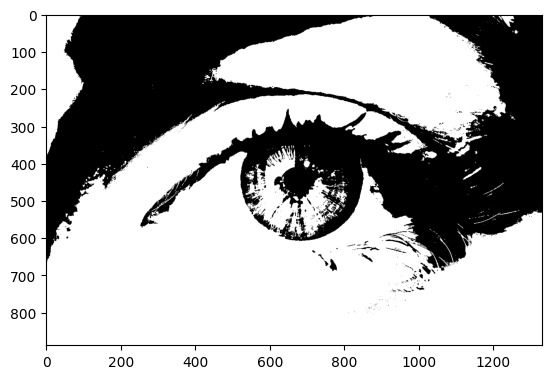

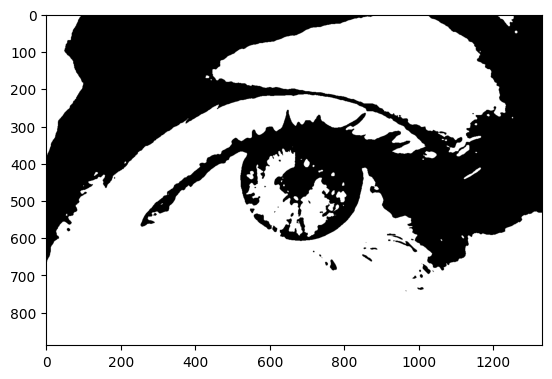

[984.5 473.5 167.1]
[725.5 541.5  50.8]
[815.5 576.5 108.6]
[825.5 533.5  85.6]
[713.5 542.5  39. ]
[623.5 480.5  74.6]
[699.5 455.5  63.8]
[486.5 447.5  83.9]
[693.5 552.5  46.2]
[764.5 509.5  35. ]
[724.5 531.5  43.6]
[751.5 507.5  36.4]
[595.5 397.5  64.7]
[700.5 566.5  30.8]
[791.5 507.5  41.1]
[759.5 448.5  37.5]
[804.5 494.5  35. ]
[681.5 574.5  33.8]
[790.5 430.5  61.1]
[599.5 479.5  43. ]


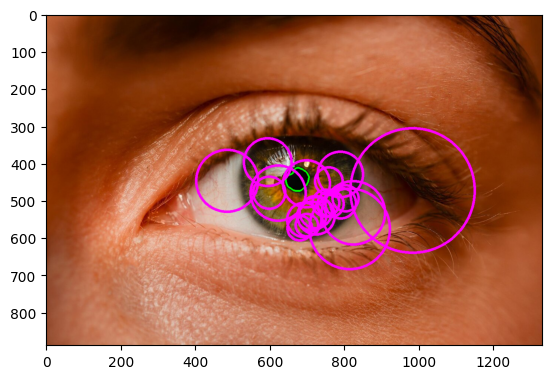

array([[[984.5, 473.5, 167.1],
        [725.5, 541.5,  50.8],
        [815.5, 576.5, 108.6],
        [825.5, 533.5,  85.6],
        [713.5, 542.5,  39. ],
        [623.5, 480.5,  74.6],
        [699.5, 455.5,  63.8],
        [486.5, 447.5,  83.9],
        [693.5, 552.5,  46.2],
        [764.5, 509.5,  35. ],
        [724.5, 531.5,  43.6],
        [751.5, 507.5,  36.4],
        [595.5, 397.5,  64.7],
        [700.5, 566.5,  30.8],
        [791.5, 507.5,  41.1],
        [759.5, 448.5,  37.5],
        [804.5, 494.5,  35. ],
        [681.5, 574.5,  33.8],
        [790.5, 430.5,  61.1],
        [599.5, 479.5,  43. ]]], dtype=float32)

In [42]:
_, threshold= cv2.threshold(gray_eye, 80, 255, cv2.THRESH_BINARY)
plt.imshow(threshold, cmap='gray')
plt.show()
filtered_image = cv2.medianBlur(threshold, 7)
plt.imshow(filtered_image, cmap='gray')
plt.show()

circles = cv2.HoughCircles(threshold, cv2.HOUGH_GRADIENT, 1, 10, param1=200, param2=45, minRadius=20, maxRadius=300)

image_circle = np.copy(image)
for circle in circles[0]:
    print(circle)
    image_circle = cv2.circle(image_circle, (int(circle[0]), int(circle[1])), int(circle[2]), (255, 0, 255), 5)
plt.imshow(cv2.cvtColor(image_circle, cv2.COLOR_BGR2RGB))
plt.show()
circles

In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
path = r'images/eye.jpg'

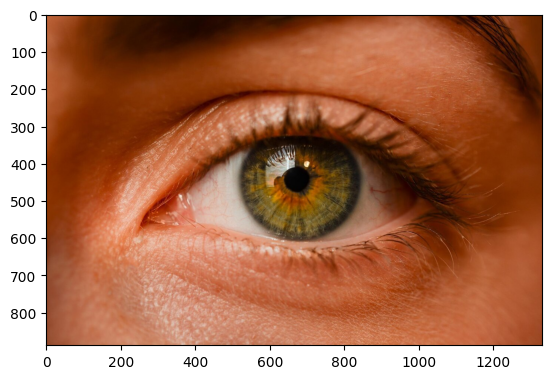

In [45]:
image = cv2.imread(path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

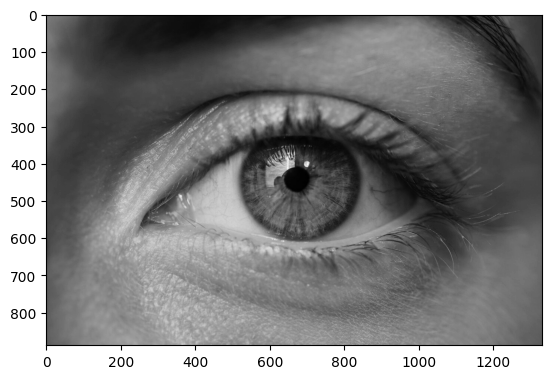

In [46]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap='gray')
plt.show()

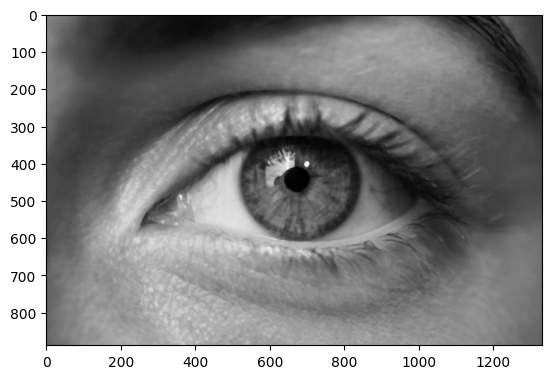

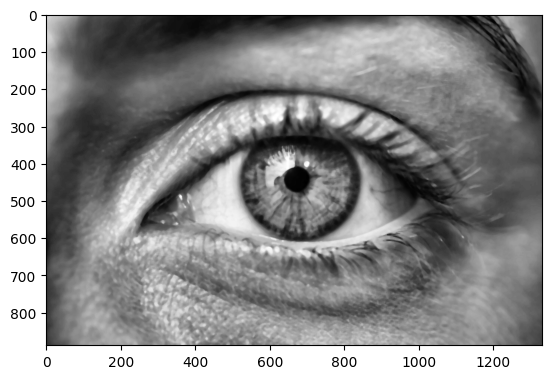

In [55]:
image_filtered_median = cv2.medianBlur(image_gray, 7)
plt.imshow(image_filtered_median, cmap='gray')
plt.show()
clahe = cv2.createCLAHE(2.0, (8,8))
image_filtered_clahe = clahe.apply(image_filtered_median)
plt.imshow(image_filtered_clahe, cmap='gray')
plt.show()

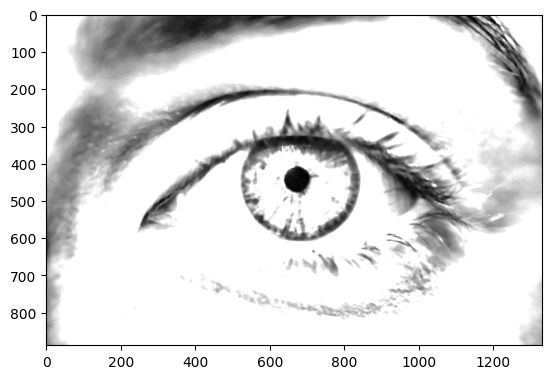

In [64]:
_, threshold_image = cv2.threshold(image_filtered_clahe, 100, 255, cv2.THRESH_TRUNC)
plt.imshow(threshold_image, cmap='gray')
plt.show()

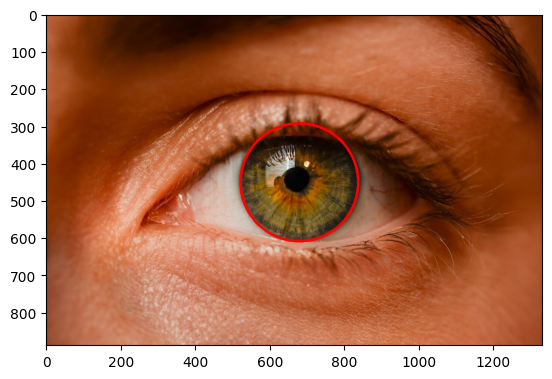

In [71]:
detected = np.copy(image_rgb)
circles = cv2.HoughCircles(threshold_image, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=130, param2=40, minRadius=100, maxRadius=200)
for circle in circles[0]:
    detected = cv2.circle(detected, (int(circle[0]), int(circle[1])), int(circle[2]), (255, 0, 0), 5)
plt.imshow(detected)
plt.show()


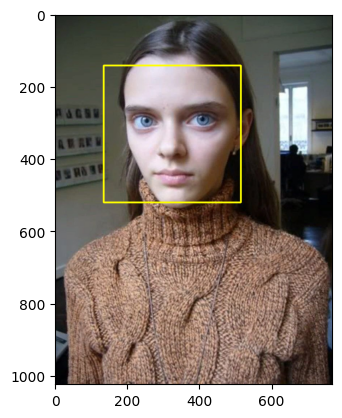

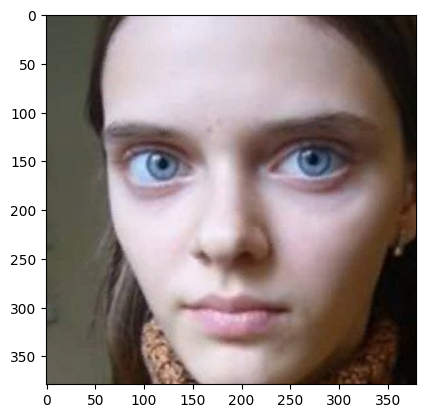

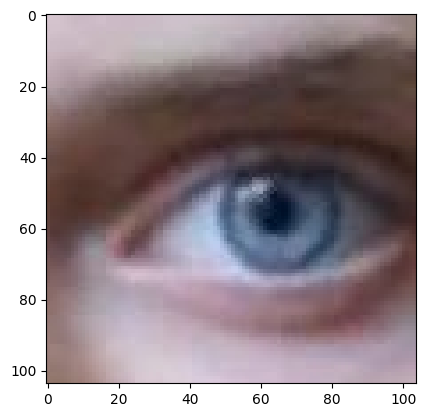

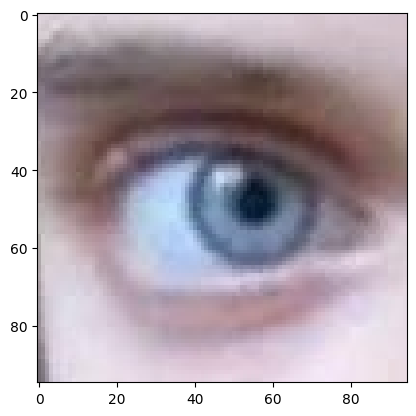

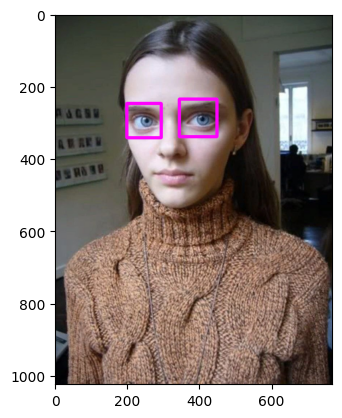

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

COLOR_FACE = (255, 255, 0)
COLOR_EYE = (255, 0, 255)
COLOR_IRIS = (0, 255, 255)
COLOR_PUPIL = (255, 0, 0)

#PATH_TO_IMAGE = r'images/test3.jpg'
PATH_TO_IMAGE = r'images/scale_1200.jpg'
PATH_TO_HAAR_FACE = r'cascades/haarcascade_frontalface_default.xml'
PATH_TO_HAAR_EYE = r'cascades/haarcascade_eye.xml'

image = cv2.imread(PATH_TO_IMAGE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

haarcascade_frontalface = cv2.CascadeClassifier(PATH_TO_HAAR_FACE)
faces = haarcascade_frontalface.detectMultiScale(image_gr, scaleFactor=1.1, minNeighbors=20)
face_detection = np.copy(image_rgb)
for (fx, fy, fw, fh) in faces: 
    face_detection = cv2.rectangle(face_detection, (fx, fy), (fx+fw, fy+fh), COLOR_FACE, int((fh+fw)*0.004))
plt.imshow(face_detection)
plt.show()
face = np.copy(image[fy:fy+fh, fx:fx+fw])
face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
face_gr = cv2.cvtColor(face_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(face_rgb)
plt.show()
haarcascade_eyes = cv2.CascadeClassifier(PATH_TO_HAAR_EYE)
eyes = haarcascade_eyes.detectMultiScale(face_gr, scaleFactor=1.1, minNeighbors=50)
eyes_detection = np.copy(image_rgb)
flag = True
#print(eyes)
for (eyx, eyy, eyw, eyh) in eyes:
    eyes_detection = cv2.rectangle(eyes_detection,(fx + eyx, fy + eyy), (fx + eyx + eyw, fy+ eyy + eyh), COLOR_EYE, int((eyh+eyw)*0.04))
    if flag:
        eye_rgb_1 = np.copy(face_rgb[eyy: eyy+eyh, eyx: eyx+eyw])
        flag = False
    else:
        eye_rgb_2 = np.copy(face_rgb[eyy: eyy+eyh, eyx: eyx+eyw])
        break
plt.imshow(eye_rgb_1)
plt.show()
plt.imshow(eye_rgb_2)
plt.show()
plt.imshow(eyes_detection)
plt.show()



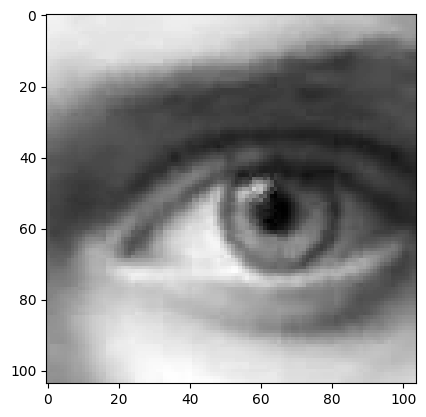

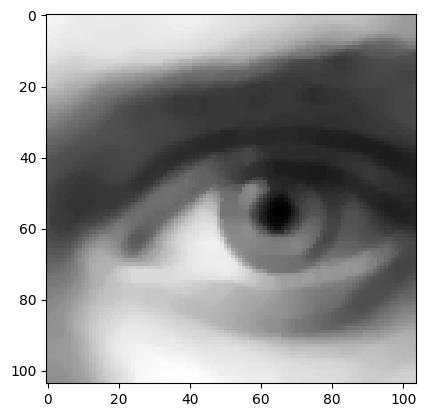

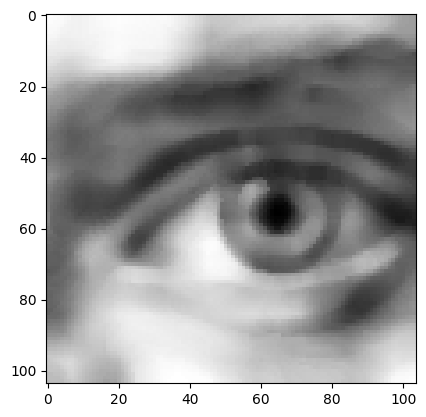

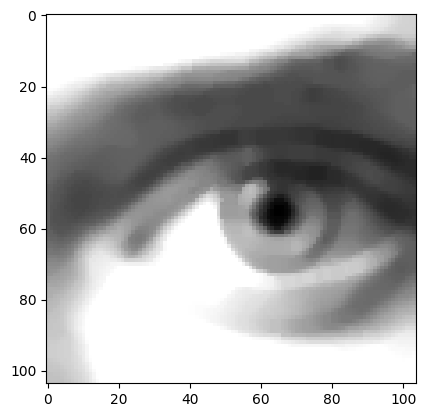

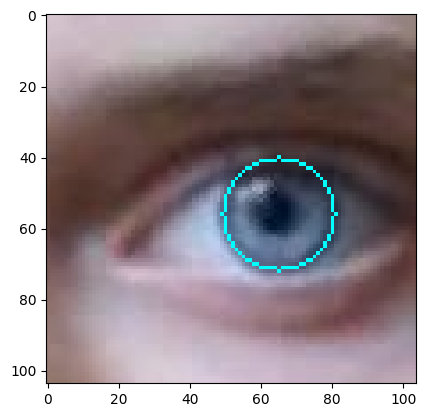

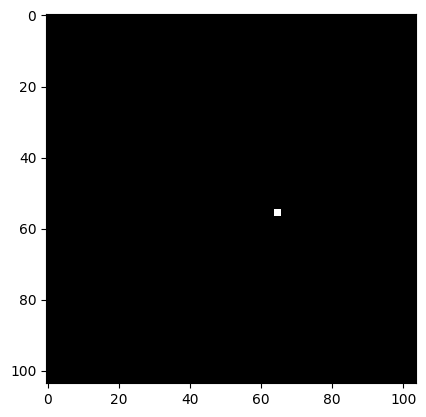

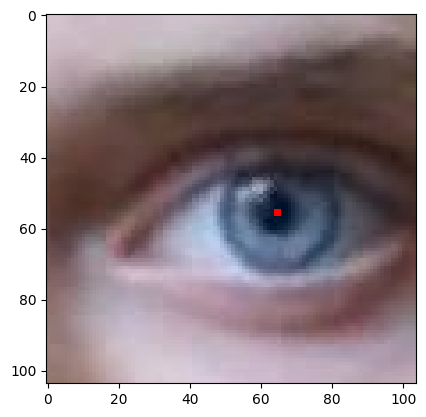

4


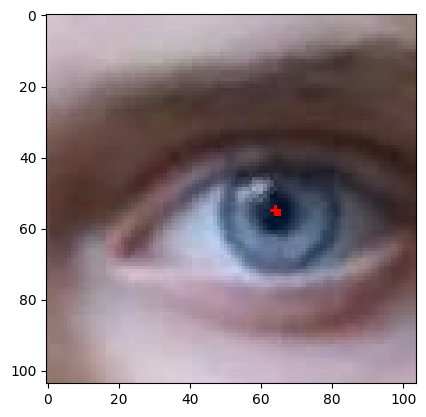

In [9]:
eye = cv2.cvtColor(eye_rgb_1, cv2.COLOR_RGB2BGR)
eye_gr = cv2.cvtColor(eye_rgb_1, cv2.COLOR_RGB2GRAY)
plt.imshow(eye_gr, cmap='gray')
plt.show()
eye_median_filtered = cv2.medianBlur(eye_gr, 7)
plt.imshow(eye_median_filtered, cmap='gray')
plt.show()
clahe = cv2.createCLAHE(2.0, (8,8))
eye_filtered_clahe = clahe.apply(eye_median_filtered)
plt.imshow(eye_filtered_clahe, cmap='gray')
plt.show()
detected_iris = np.copy(eye_rgb_1)
_, threshold_eye = cv2.threshold(eye_median_filtered, 160, 255, cv2.THRESH_TRUNC)
plt.imshow(threshold_eye, cmap='gray')
plt.show()
circles = cv2.HoughCircles(threshold_eye, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=80, param2=20, minRadius=10, maxRadius=25)

for circle in circles[0]:
    detected_iris = cv2.circle(detected_iris, (int(circle[0]), int(circle[1])), int(circle[2]), COLOR_IRIS, 1)
plt.imshow(detected_iris)
plt.show()
detected_pupil = np.copy(eye_rgb_1)
_, threshold_eye = cv2.threshold(eye_filtered_clahe, 20, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshold_eye, cmap='gray')
plt.show()
contours, _ = cv2.findContours(threshold_eye, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
detected_pupil = cv2.drawContours(detected_pupil, [contours[0]], -1, COLOR_PUPIL, 1)
plt.imshow(detected_pupil)
plt.show()
print(len(contours[0]))
sum_x = sum([i[0][0] for i in contours[0]])
sum_y = sum([i[0][1] for i in contours[0]])
center = (sum_x // len(contours[0]), sum_y // len(contours[0]))
detected_pupil = cv2.circle(detected_pupil, center, radius=1, color=(255, 0, 0), thickness=-1)
plt.imshow(detected_pupil)
plt.show()

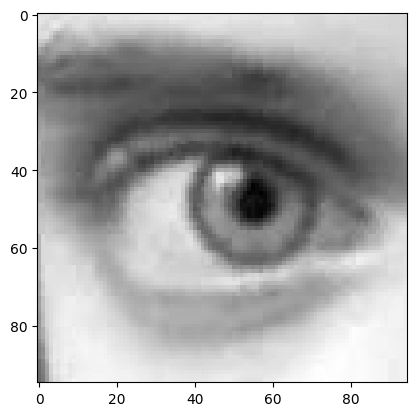

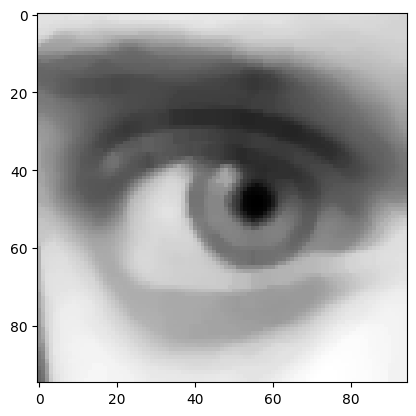

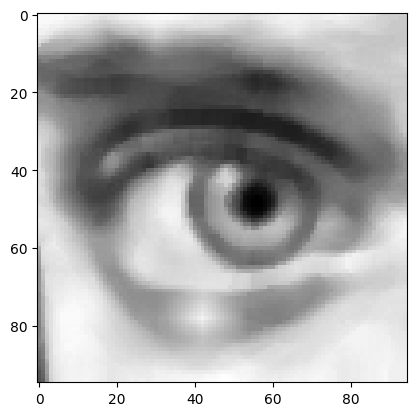

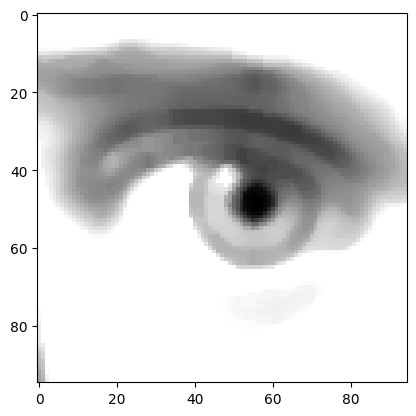

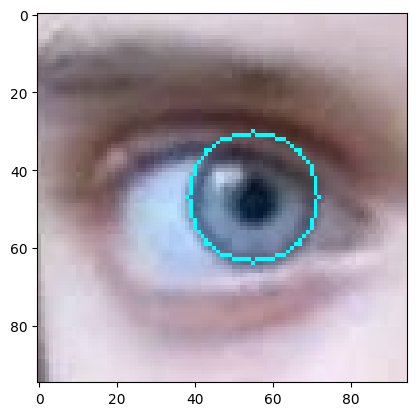

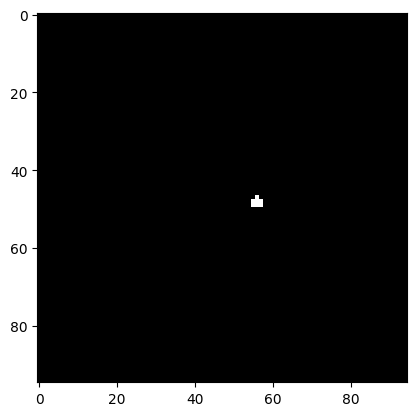

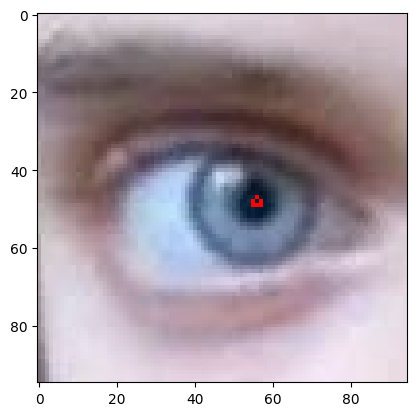

In [10]:
eye = cv2.cvtColor(eye_rgb_2, cv2.COLOR_RGB2BGR)
eye_gr = cv2.cvtColor(eye_rgb_2, cv2.COLOR_RGB2GRAY)
plt.imshow(eye_gr, cmap='gray')
plt.show()
eye_median_filtered = cv2.medianBlur(eye_gr, 7)
plt.imshow(eye_median_filtered, cmap='gray')
plt.show()
clahe = cv2.createCLAHE(2.0, (8,8))
eye_filtered_clahe = clahe.apply(eye_median_filtered)
plt.imshow(eye_filtered_clahe, cmap='gray')
plt.show()
detected_iris = np.copy(eye_rgb_2)
_, threshold_eye = cv2.threshold(eye_median_filtered, 160, 255, cv2.THRESH_TRUNC)
plt.imshow(threshold_eye, cmap='gray')
plt.show()
circles = cv2.HoughCircles(threshold_eye, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=80, param2=20, minRadius=10, maxRadius=25)

for circle in circles[0]:
    detected_iris = cv2.circle(detected_iris, (int(circle[0]), int(circle[1])), int(circle[2]), COLOR_IRIS, 1)
plt.imshow(detected_iris)
plt.show()
detected_pupil = np.copy(eye_rgb_2)
_, threshold_eye = cv2.threshold(eye_filtered_clahe, 30, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshold_eye, cmap='gray')
plt.show()
contours, _ = cv2.findContours(threshold_eye, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
detected_pupil = cv2.drawContours(detected_pupil, [contours[0]], -1, COLOR_PUPIL, 1)
plt.imshow(detected_pupil)
plt.show()

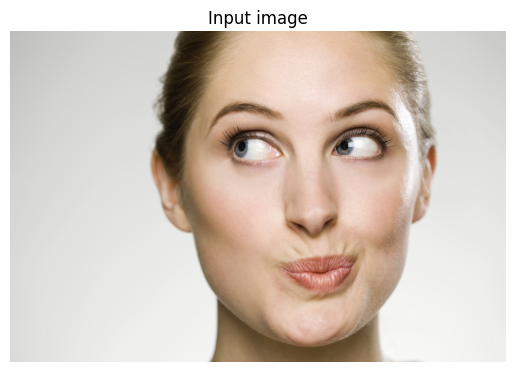

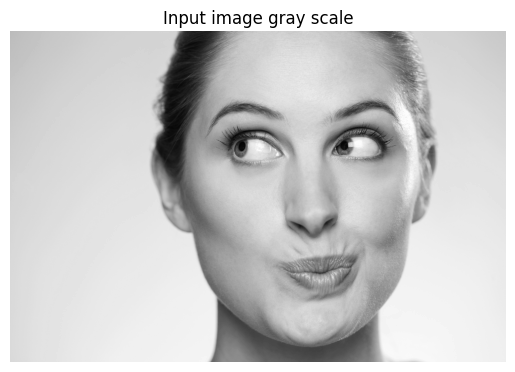

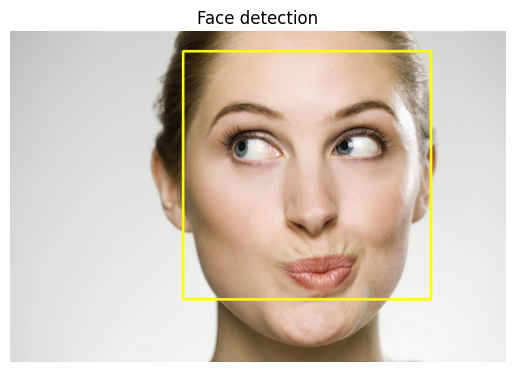

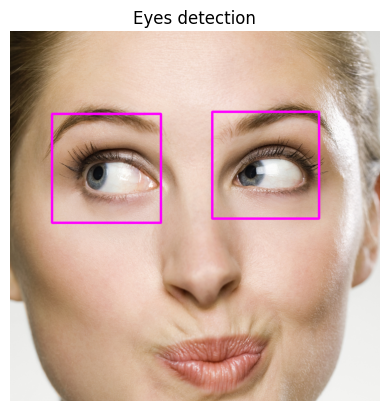

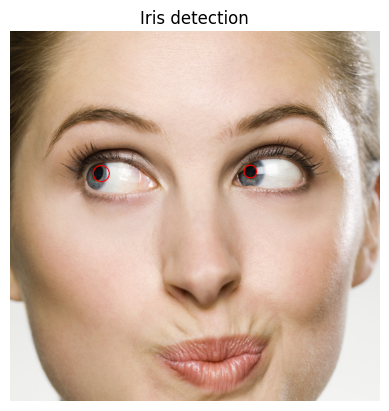

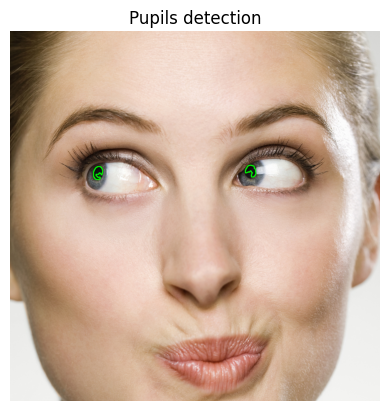

Horizontal view direction using iris detection is: left-forward
Vertical view direction using iris detection is: forward-forward
Horizontal view direction using pupil detection is: left-forward
Vertical view direction using pupil detection is: forward-forward
Deviations using iris detection is: [[0.35784313725490197, 0.5604575163398693], [0.453525641025641, 0.5496794871794872]]
Deviations using pupil detection is: [[0.35947712418300654, 0.5555555555555556], [0.4230769230769231, 0.5384615384615384]]


In [3]:
from main import EYE_DETECTION

DEVIATION_LIMIT_MAX = 0.6
DEVIATION_LIMIT_MIN = 0.4
#path = r'images/scale_1200.jpg'
path = r'images/test3.jpg'
detection = EYE_DETECTION(path, r'cascades/haarcascade_frontalface_default.xml', r'cascades/haarcascade_eye.xml')
detection(pupil_thres=20, minNeighborsEyes=100)
detection.draw_detection()

i_cent = detection.irises_centers
p_cent = detection.pupils_centers

p_deviations = []
i_deviations = []
i_results = []
p_results = []
#print(f'\n\n{i_cent}, \t {p_cent}\n')
for i in range(len(detection.eyes_rect[0:2])):
    _, _, ew, eh = detection.eyes_rect[i]
    i_deviations.append([i_cent[i][0]/ew, i_cent[i][1]/eh])
    if i_cent[i][0]/ew <= DEVIATION_LIMIT_MIN:
        i_results.append('left')
    elif i_cent[i][0]/ew >= DEVIATION_LIMIT_MAX:
        i_results.append('right')
    else:
        i_results.append('forward')
    if i_cent[i][1]/ew <= DEVIATION_LIMIT_MIN:
        i_results.append('up')
    elif i_cent[i][1]/ew >= DEVIATION_LIMIT_MAX:
        i_results.append('down')
    else:
        i_results.append('forward')
    p_deviations.append([p_cent[i][0]/ew, p_cent[i][1]/eh])
    if p_cent[i][0]/ew <= DEVIATION_LIMIT_MIN:
        p_results.append('left')
    elif p_cent[i][0]/ew >= DEVIATION_LIMIT_MAX:
        p_results.append('right')
    else:
        p_results.append('forward')
    if p_cent[i][1]/ew <= DEVIATION_LIMIT_MIN:
        p_results.append('up')
    elif p_cent[i][1]/ew >= DEVIATION_LIMIT_MAX:
        p_results.append('down')
    else:
        p_results.append('forward')    

print(f'Horizontal view direction using iris detection is: {i_results[0]}-{i_results[2]}')
print(f'Vertical view direction using iris detection is: {i_results[1]}-{i_results[3]}')
print(f'Horizontal view direction using pupil detection is: {p_results[0]}-{p_results[2]}')
print(f'Vertical view direction using pupil detection is: {p_results[1]}-{p_results[3]}')
print(f'Deviations using iris detection is: {i_deviations}')
print(f'Deviations using pupil detection is: {p_deviations}')
#[array([65.5, 56.5], dtype=float32), array([55.5, 47.5], dtype=float32)] [(32, 27), (23, 20)]



    